In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv(r'C:\JupyterNotebook\DataSet\Lego.csv')

In [3]:
df.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
0,19,29.99,2,277,4.0,0,4.5,0,4.0,20
1,19,19.99,2,168,4.0,2,5.0,0,4.0,20
2,19,12.99,11,74,4.3,2,4.3,0,4.1,20
3,5,99.99,23,1032,3.6,0,4.6,1,4.3,20
4,5,79.99,14,744,3.2,1,4.6,1,4.1,20


In [4]:
X = df.drop('list_price',axis=1)
y = df['list_price']

In [5]:
# spliting the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.3,random_state=6)

In [6]:
cols = X_train.columns

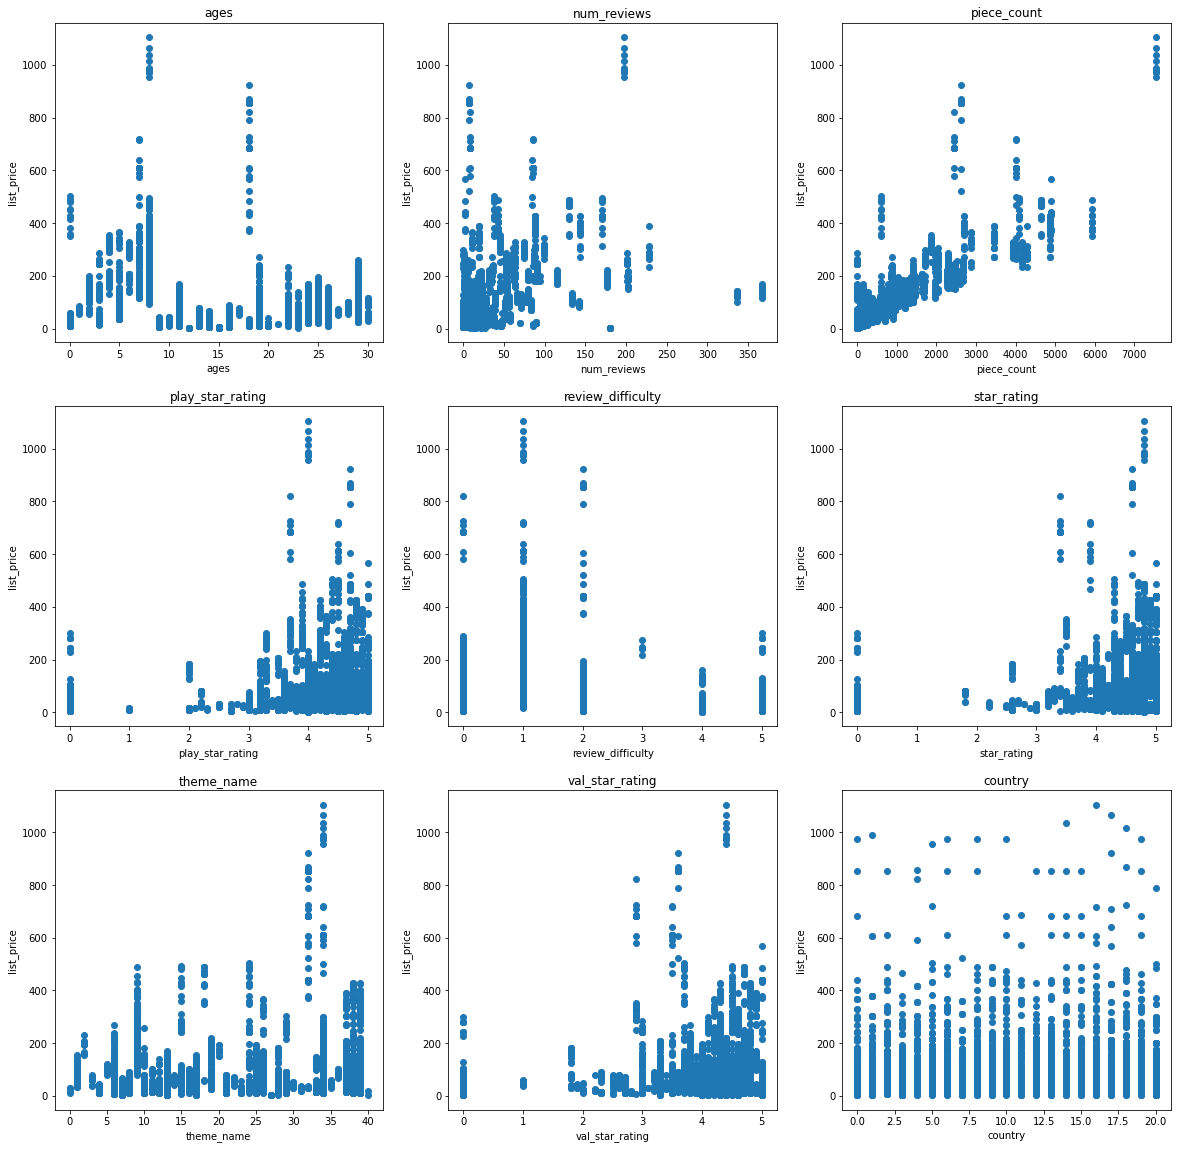

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))

for i in range(0,3):
    for j in range(0,3): 
            col = cols[i*3 + j]
            axes[i,j].set_title(col)
            axes[i,j].scatter(X_train[col],y_train)
            axes[i,j].set_xlabel(col)
            axes[i,j].set_ylabel('list_price')
        

plt.show()

In [8]:
corr = X_train.corr()
corr

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
ages,1.000000,-0.160969,-0.090685,0.232847,-0.239683,0.102633,0.476178,0.116349,-0.001526
num_reviews,-0.160969,1.000000,0.542924,0.151801,-0.196846,0.160762,0.012342,0.172431,0.001953
piece_count,-0.090685,0.542924,1.000000,0.174411,-0.312239,0.180903,0.173318,0.192863,0.002506
play_star_rating,0.232847,0.151801,0.174411,1.000000,-0.670508,0.902573,0.151078,0.921824,-0.000958
review_difficulty,-0.239683,-0.196846,-0.312239,-0.670508,1.000000,-0.637901,-0.153948,-0.650333,0.006417
star_rating,0.102633,0.160762,0.180903,0.902573,-0.637901,1.000000,0.065264,0.908720,-0.003865
theme_name,0.476178,0.012342,0.173318,0.151078,-0.153948,0.065264,1.000000,0.097430,-0.003625
val_star_rating,0.116349,0.172431,0.192863,0.921824,-0.650333,0.908720,0.097430,1.000000,0.002413
country,-0.001526,0.001953,0.002506,-0.000958,0.006417,-0.003865,-0.003625,0.002413,1.000000


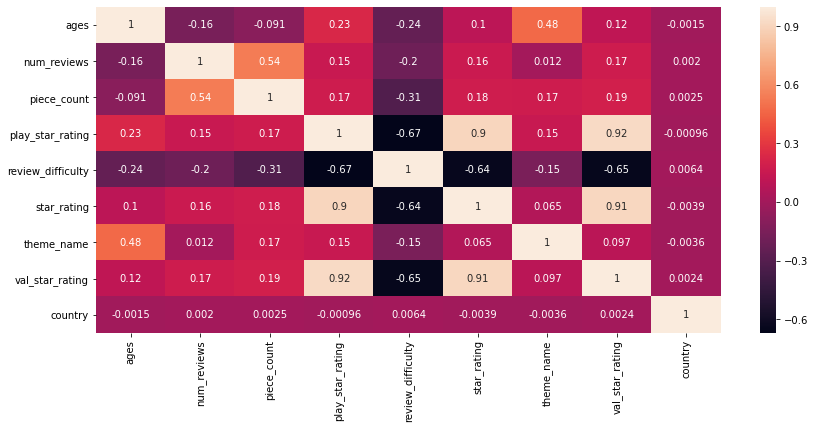

In [9]:
fig,ax = plt.subplots(figsize = (14,6))
sns.heatmap(corr,annot = True,annot_kws={'size':10})

In [10]:
X_train.drop(['play_star_rating','val_star_rating'],axis = 1 ,inplace=True)
X_test.drop(['play_star_rating','val_star_rating'], axis = 1 ,inplace=True)

C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
print("mse = ",mse)
print("r2 = ",r2)

mse =  2106.763431185767
r2 =  0.7747160273433752


In [13]:
residual = (y_test - y_pred)

<function matplotlib.pyplot.show(*args, **kw)>

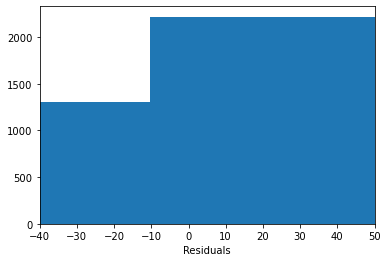

In [14]:
ax = plt.hist(residual)
plt.xlim(-40,50)
plt.xlabel('Residuals')
plt.show